In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

%matplotlib inline

import geopy.distance


In [2]:
bike = pd.read_csv('df_1_year.csv', sep=',')

In [3]:
bike.head(20)

,Unnamed: 0,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Year,Month,ride_length,Year-Month
0,0,99103BB87CC6C1BB,electric_bike,2021-08-10 17:15:49,2021-08-10 17:22:44,NaN,NaN,NaN,NaN,41.770000,-87.680000,41.770000,-87.680000,member,2021,8,6.916667,2021-08-01 00:00:00
1,1,EAFCCCFB0A3FC5A1,electric_bike,2021-08-10 17:23:14,2021-08-10 17:39:24,NaN,NaN,NaN,NaN,41.770000,-87.680000,41.770000,-87.630000,member,2021,8,16.166667,2021-08-01 00:00:00
2,2,9EF4F46C57AD234D,electric_bike,2021-08-21 02:34:23,2021-08-21 02:50:36,NaN,NaN,NaN,NaN,41.950000,-87.650000,41.970000,-87.660000,member,2021,8,16.216667,2021-08-01 00:00:00
3,5,612F12C94A964F3E,electric_bike,2021-08-19 12:41:12,2021-08-19 12:47:47,NaN,NaN,NaN,NaN,41.810000,-87.610000,41.800000,-87.600000,member,2021,8,6.583333,2021-08-01 00:00:00
4,6,C7435946FDFFA9B7,electric_bike,2021-08-19 12:21:50,2021-08-19 12:37:31,NaN,NaN,NaN,NaN,41.770000,-87.620000,41.810000,-87.610000,member,2021,8,15.683333,2021-08-01 00:00:00
5,8,ABC4532F2B4983AB,electric_bike,2021-08-17 18:23:55,2021-08-17 18:24:13,NaN,NaN,NaN,NaN,41.920000,-87.660000,41.920000,-87.660000,member,2021,8,0.300000,2021-08-01 00:00:00
6,9,82437E52DC3B9A8A,electric_bike,2021-08-04 12:50:53,2021-08-04 13:08:20,NaN,NaN,NaN,NaN,41.740000,-87.530000,41.740000,-87.530000,member,2021,8,17.450000,2021-08-01 00:00:00
7,10,2FF71C763499B208,electric_bike,2021-08-01 18:11:35,2021-08-01 18:17:05,NaN,NaN,NaN,NaN,41.950000,-87.710000,41.970000,-87.710000,member,2021,8,5.500000,2021-08-01 00:00:00
8,11,B172B2E331744FE9,electric_bike,2021-08-01 18:26:59,2021-08-01 18:32:23,NaN,NaN,NaN,NaN,41.970000,-87.710000,41.960000,-87.710000,member,2021,8,5.400000,2021-08-01 00:00:00
9,12,B161B34EC9BB652B,electric_bike,2021-08-01 08:16:41,2021-08-01 08:46:14,NaN,NaN,NaN,NaN,41.960000,-87.710000,41.890000,-87.650000,member,2021,8,29.550000,2021-08-01 00:00:00


In [4]:
bike.tail(20)

,Unnamed: 0,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Year,Month,ride_length,Year-Month
3235867,823468,1EDFD07D53BC9E0A,electric_bike,2022-07-27 16:03:19,2022-07-27 16:07:53,NaN,NaN,NaN,NaN,41.93,-87.79,41.93,-87.78,member,2022,7,4.566667,2022-07-01 00:00:00
3235868,823469,FA674787E77C46C1,electric_bike,2022-07-24 23:12:44,2022-07-24 23:14:27,NaN,NaN,NaN,NaN,41.89,-87.63,41.89,-87.63,member,2022,7,1.716667,2022-07-01 00:00:00
3235869,823470,A528E85AD7961D67,electric_bike,2022-07-08 20:26:37,2022-07-08 20:43:58,NaN,NaN,NaN,NaN,41.98,-87.65,41.98,-87.67,member,2022,7,17.350000,2022-07-01 00:00:00
3235870,823471,163D267E17E7AE71,electric_bike,2022-07-09 00:33:29,2022-07-09 00:39:57,NaN,NaN,NaN,NaN,41.98,-87.67,42.00,-87.67,member,2022,7,6.466667,2022-07-01 00:00:00
3235871,823472,4EEA8BBF03A7E228,electric_bike,2022-07-21 16:37:57,2022-07-21 17:08:01,NaN,NaN,NaN,NaN,41.94,-87.65,41.88,-87.66,member,2022,7,30.066667,2022-07-01 00:00:00
3235872,823473,8E0AFFE1E1CA309A,electric_bike,2022-07-13 16:32:58,2022-07-13 16:59:18,NaN,NaN,NaN,NaN,41.94,-87.67,41.94,-87.65,member,2022,7,26.333333,2022-07-01 00:00:00
3235873,823474,21F5C29FEE5008D0,electric_bike,2022-07-13 18:42:20,2022-07-13 19:03:07,NaN,NaN,NaN,NaN,41.75,-87.68,41.75,-87.68,member,2022,7,20.783333,2022-07-01 00:00:00
3235874,823475,99510EF15293841F,electric_bike,2022-07-13 01:22:27,2022-07-13 01:46:18,NaN,NaN,NaN,NaN,41.75,-87.68,41.75,-87.68,member,2022,7,23.850000,2022-07-01 00:00:00
3235875,823476,503E6096A626E092,electric_bike,2022-07-12 19:27:41,2022-07-12 19:53:41,NaN,NaN,NaN,NaN,41.74,-87.68,41.75,-87.68,member,2022,7,26.000000,2022-07-01 00:00:00
3235876,823477,9EE2F93963BFA36E,electric_bike,2022-07-19 23:42:46,2022-07-19 23:49:43,NaN,NaN,NaN,NaN,41.87,-87.67,41.87,-87.68,member,2022,7,6.950000,2022-07-01 00:00:00


In [5]:
bike.describe()

,Unnamed: 0,start_lat,start_lng,end_lat,end_lng,Year,Month,ride_length
count,3.235887e+06,3.235887e+06,3.235887e+06,3.235669e+06,3.235669e+06,3.235887e+06,3.235887e+06,3.235887e+06
mean,3.463536e+05,4.190135e+01,-8.764817e+01,4.190154e+01,-8.764835e+01,2.021525e+03,7.268139e+00,1.260825e+01
std,2.264062e+05,4.682097e-02,3.033355e-02,4.695840e-02,3.047241e-02,4.993954e-01,2.465169e+00,8.815981e+00
min,0.000000e+00,4.164000e+01,-8.784000e+01,4.160000e+01,-8.787000e+01,2.021000e+03,1.000000e+00,1.666667e-02
25%,1.491620e+05,4.188169e+01,-8.766358e+01,4.188169e+01,-8.766371e+01,2.021000e+03,6.000000e+00,5.916667e+00
50%,3.189830e+05,4.190000e+01,-8.764414e+01,4.190022e+01,-8.764414e+01,2.022000e+03,7.000000e+00,1.023333e+01
75%,5.355470e+05,4.193000e+01,-8.762979e+01,4.193000e+01,-8.762979e+01,2.022000e+03,9.000000e+00,1.726667e+01
max,8.234870e+05,4.207000e+01,-8.752000e+01,4.211000e+01,-8.750000e+01,2.022000e+03,1.200000e+01,4.028333e+01


In [6]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3235887 entries, 0 to 3235886
Data columns (total 18 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Unnamed: 0          int64  
 1   ride_id             object 
 2   rideable_type       object 
 3   started_at          object 
 4   ended_at            object 
 5   start_station_name  object 
 6   start_station_id    object 
 7   end_station_name    object 
 8   end_station_id      object 
 9   start_lat           float64
 10  start_lng           float64
 11  end_lat             float64
 12  end_lng             float64
 13  member_casual       object 
 14  Year                int64  
 15  Month               int64  
 16  ride_length         float64
 17  Year-Month          object 
dtypes: float64(5), int64(3), object(10)
memory usage: 444.4+ MB


In [7]:
bike['member_casual'].value_counts()

member    1916317
casual    1319570
Name: member_casual, dtype: int64

In [8]:
#remove hour/min/sec from Year-Month column for better visualization

bike['Year-Month'] = bike['Year-Month'].str.split().str[0]
bike.head()

,Unnamed: 0,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Year,Month,ride_length,Year-Month
0,0,99103BB87CC6C1BB,electric_bike,2021-08-10 17:15:49,2021-08-10 17:22:44,NaN,NaN,NaN,NaN,41.77,-87.68,41.77,-87.68,member,2021,8,6.916667,2021-08-01
1,1,EAFCCCFB0A3FC5A1,electric_bike,2021-08-10 17:23:14,2021-08-10 17:39:24,NaN,NaN,NaN,NaN,41.77,-87.68,41.77,-87.63,member,2021,8,16.166667,2021-08-01
2,2,9EF4F46C57AD234D,electric_bike,2021-08-21 02:34:23,2021-08-21 02:50:36,NaN,NaN,NaN,NaN,41.95,-87.65,41.97,-87.66,member,2021,8,16.216667,2021-08-01
3,5,612F12C94A964F3E,electric_bike,2021-08-19 12:41:12,2021-08-19 12:47:47,NaN,NaN,NaN,NaN,41.81,-87.61,41.80,-87.60,member,2021,8,6.583333,2021-08-01
4,6,C7435946FDFFA9B7,electric_bike,2021-08-19 12:21:50,2021-08-19 12:37:31,NaN,NaN,NaN,NaN,41.77,-87.62,41.81,-87.61,member,2021,8,15.683333,2021-08-01


In [9]:
#Convert start and end columns to datetime format

bike['started_at'] = pd.to_datetime(bike['started_at'])
bike['ended_at'] = pd.to_datetime(bike['ended_at'])

#Add day of the week and hour of the day columns

bike['start_days'] = bike['started_at'].dt.day_name()
bike['hour'] = bike['started_at'].dt.hour


In [10]:
bike.head()

,Unnamed: 0,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Year,Month,ride_length,Year-Month,start_days,hour
0,0,99103BB87CC6C1BB,electric_bike,2021-08-10 17:15:49,2021-08-10 17:22:44,NaN,NaN,NaN,NaN,41.77,-87.68,41.77,-87.68,member,2021,8,6.916667,2021-08-01,Tuesday,17
1,1,EAFCCCFB0A3FC5A1,electric_bike,2021-08-10 17:23:14,2021-08-10 17:39:24,NaN,NaN,NaN,NaN,41.77,-87.68,41.77,-87.63,member,2021,8,16.166667,2021-08-01,Tuesday,17
2,2,9EF4F46C57AD234D,electric_bike,2021-08-21 02:34:23,2021-08-21 02:50:36,NaN,NaN,NaN,NaN,41.95,-87.65,41.97,-87.66,member,2021,8,16.216667,2021-08-01,Saturday,2
3,5,612F12C94A964F3E,electric_bike,2021-08-19 12:41:12,2021-08-19 12:47:47,NaN,NaN,NaN,NaN,41.81,-87.61,41.80,-87.60,member,2021,8,6.583333,2021-08-01,Thursday,12
4,6,C7435946FDFFA9B7,electric_bike,2021-08-19 12:21:50,2021-08-19 12:37:31,NaN,NaN,NaN,NaN,41.77,-87.62,41.81,-87.61,member,2021,8,15.683333,2021-08-01,Thursday,12


In [11]:
#populate bike types in pie chart with color palette.
bike_types = bike['rideable_type'].value_counts().to_frame()
bike_types

,rideable_type
classic_bike,1663393
electric_bike,1483437
docked_bike,89057


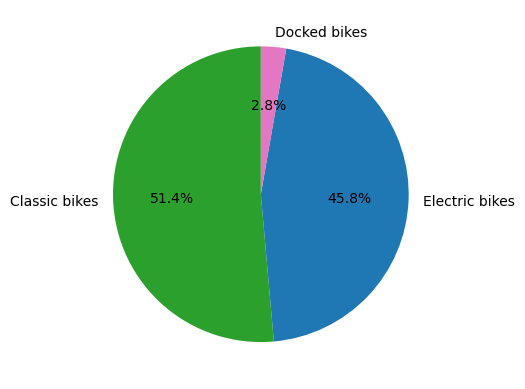

In [12]:
#palette_color = sns.color_palette('pastel')
pie = plt.pie(bike_types['rideable_type'], labels = ['Classic bikes', 'Electric bikes', 'Docked bikes'], colors=['tab:green', 'tab:blue', 'tab:pink'], autopct='%1.1f%%', startangle=90) #shadow=True


In [13]:
#user type
user_types = bike['member_casual'].value_counts().to_frame()
user_types

,member_casual
member,1916317
casual,1319570


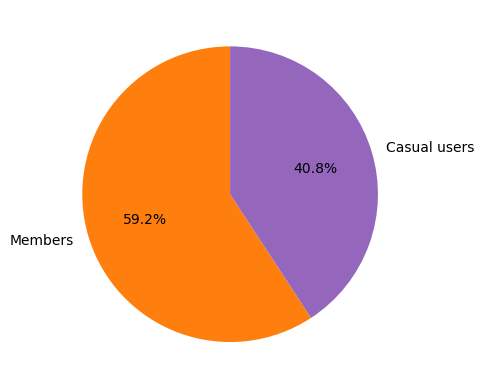

In [14]:
pie2 = plt.pie(user_types['member_casual'], labels = ['Members', 'Casual users'], colors=['tab:orange', 'tab:purple'], autopct='%1.1f%%', startangle=90) #shadow=True
pie2;

In [15]:
rides_by_type = bike[['Year-Month','rideable_type']].pivot_table(index=['Year-Month'], columns=['rideable_type'], aggfunc=len)
#rides_by_type.reset_index()
# remove time from a pandas series of dates
#rides_by_type['Year-Month'].dt.date

#Year-Month being our index:
#rides_by_type.index = rides_by_type.index.to_period('M').to_timestamp('M')
#rides_by_type.index = pd.to_datetime(rides_by_type.index.strftime('%Y-%m'))

rides_by_type
#rides_by_type.to_csv('rides_by_type.csv')

rideable_type,classic_bike,docked_bike,electric_bike
Year-Month,,,
2021-08-01,295698,19359,153612
2021-09-01,257308,14259,157601
2021-10-01,169768,9095,162782
2021-11-01,74655,3018,102527
2021-12-01,47994,1817,68906
2022-01-01,25451,375,22464
2022-02-01,27520,456,25933
2022-03-01,64303,2889,70220
2022-04-01,83519,4271,99398


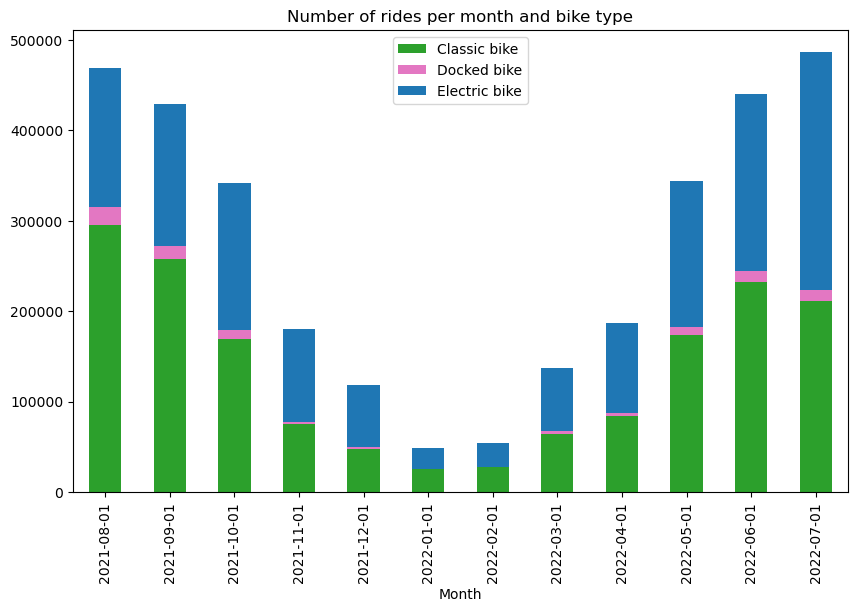

In [16]:
# Create a stacked horizontal bar chart of the sales for each sales channel for each of the top 10 suppliers
ax = rides_by_type.plot(kind='bar', stacked=True, figsize=(10, 6), color=['tab:green', 'tab:pink', 'tab:blue'])

ax.set_title('Number of rides per month and bike type')
ax.set_xlabel('Month')
ax.legend(['Classic bike', 'Docked bike', 'Electric bike'])


# Show the chart
plt.show()

In [17]:
rides_by_client = bike[['Year-Month','member_casual']].pivot_table(index=['Year-Month'], columns=['member_casual'], aggfunc=len)

rides_by_client
#rides_by_client.to_csv('rides_by_client.csv')

member_casual,casual,member
Year-Month,,
2021-08-01,223790,244879
2021-09-01,195120,234048
2021-10-01,130931,210714
2021-11-01,51269,128931
2021-12-01,31923,86794
2022-01-01,8339,39951
2022-02-01,9504,44405
2022-03-01,39982,97430
2022-04-01,58857,128331


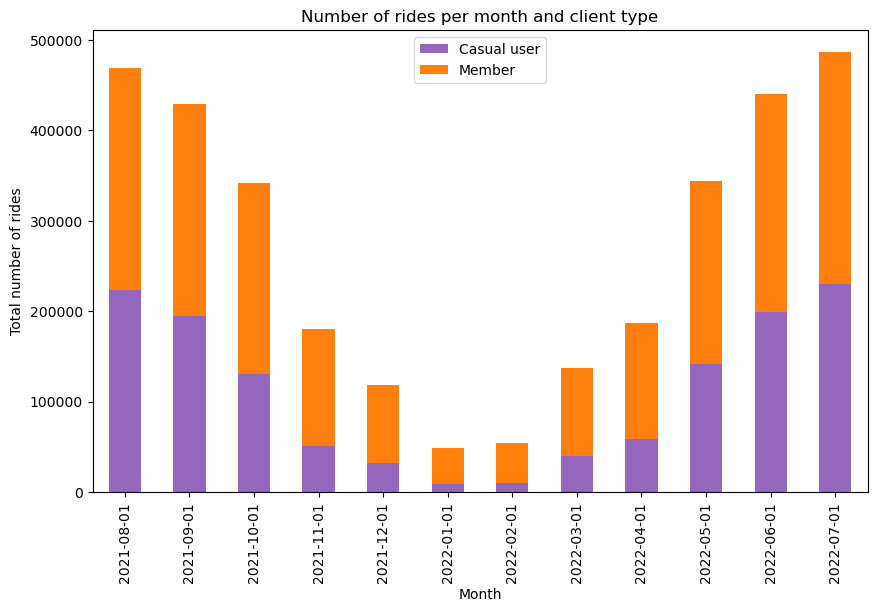

In [18]:
# Create a stacked horizontal bar chart of the sales for each sales channel for each of the top 10 suppliers
ax = rides_by_client.plot(kind='bar', stacked=True, figsize=(10, 6), color=['tab:purple', 'tab:orange'])

ax.set_title('Number of rides per month and client type')
ax.set_xlabel('Month')
ax.set_ylabel('Total number of rides')
ax.legend(['Casual user', 'Member'])


# Show the chart
plt.show()

In [19]:
# checking the bike type and average riding duration relationship, visualization.
bike_duration = bike.groupby('rideable_type')['ride_length'].mean().to_frame().reset_index()
bike_duration

,rideable_type,ride_length
0,classic_bike,12.936657
1,docked_bike,20.195452
2,electric_bike,11.784503


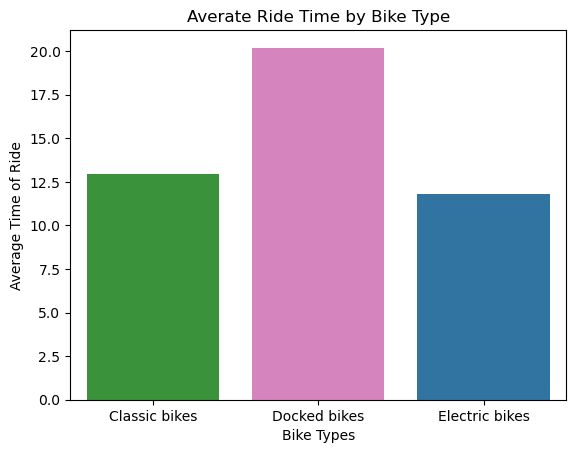

In [20]:
colors = ['tab:green', 'tab:pink', 'tab:blue']
plot = sns.barplot(data=bike_duration, x="rideable_type", y="ride_length", palette=colors)
plot.set_title ('Averate Ride Time by Bike Type')
plot.set_xlabel('Bike Types')
plot.set_xticklabels(['Classic bikes', 'Docked bikes', 'Electric bikes'])
plot.set_ylabel('Average Time of Ride');

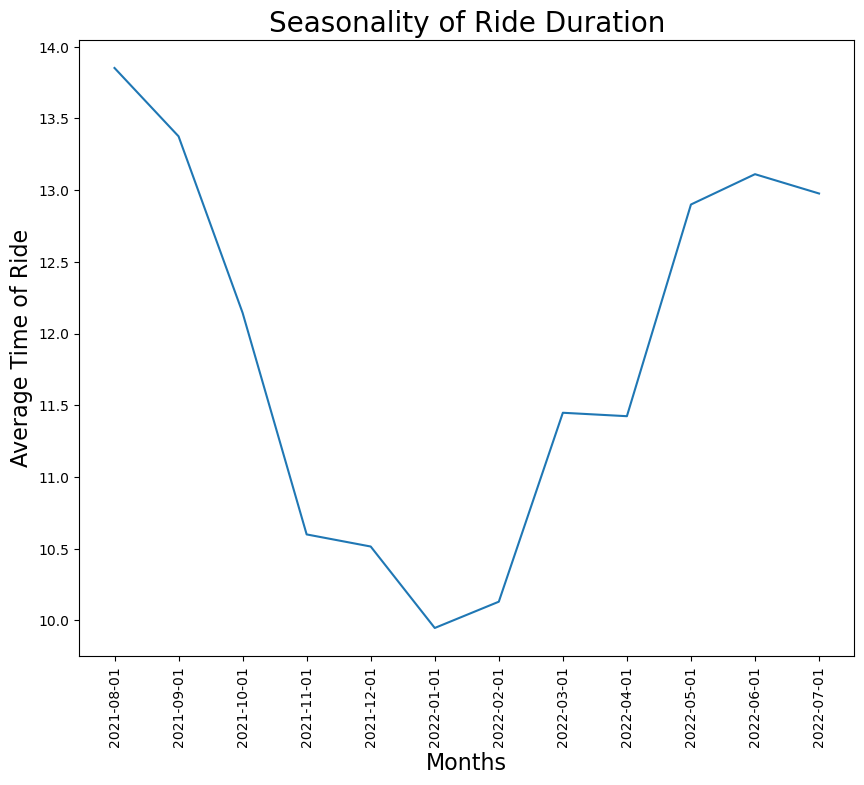

In [21]:
# checking the average riding duration in time(monthly basis), visualize it.
average_duration = bike.groupby('Year-Month')['ride_length'].mean().to_frame().reset_index()
average_duration

plt.figure(figsize=(10, 8))
plot = sns.lineplot(data=average_duration, x="Year-Month", y="ride_length", sizes=(.5, 3.5))
plt.setp(plot.get_xticklabels(), rotation=90);
plot.set_title ('Seasonality of Ride Duration', fontsize=20)
plot.set_xlabel('Months', fontsize=16)
plot.set_ylabel('Average Time of Ride', fontsize=16);

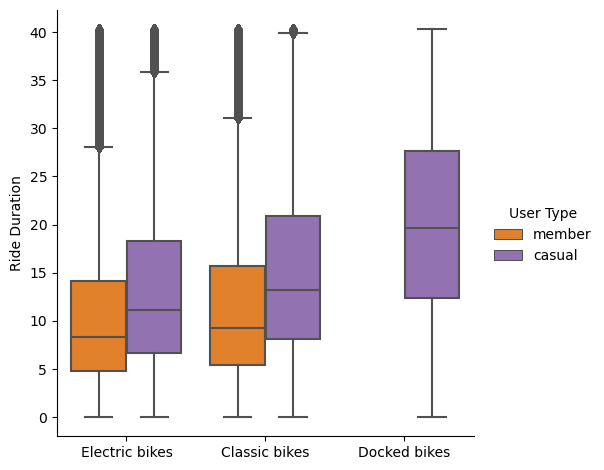

In [22]:
#average duration for each type of bike and member type:
colors = ['tab:orange', 'tab:purple']
plot = sns.catplot(data=bike, x="rideable_type", y="ride_length", hue="member_casual", kind="box", palette=colors);
plot.set_axis_labels("", "Ride Duration")
plot._legend.set_title('User Type')
plot.set_xticklabels(['Electric bikes', 'Classic bikes', 'Docked bikes'])
plt.show()

In [23]:
#Filter members / casual users

member_filter = bike['member_casual'] == 'member'
member_bike = bike.loc[member_filter, ['hour', 'member_casual', 'start_days']]
member_times = member_bike.pivot_table(index=['hour'], columns=['start_days', 'member_casual'], aggfunc=len)
member_times


start_days,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
member_casual,member,member,member,member,member,member,member
hour,,,,,,,
0,2856,1780,5070,6027,2051,1423,1627
1,1636,1052,3956,4202,934,714,784
2,845,590,2241,2647,448,410,401
3,479,399,1316,1486,367,293,284
4,720,691,793,1061,667,695,678
5,2952,3151,1167,1172,3394,3765,3770
6,8144,8513,2798,2445,9311,10381,10085
7,14155,15610,5446,4078,18579,20420,19757


In [24]:
member_filter = bike['member_casual'] == 'member'
member_bike = bike.loc[member_filter, ['hour', 'member_casual', 'start_days']]

# Bin the hours into periods of 2 hours
#member_bike['hour_bin'] = pd.cut(member_bike['hour'], bins=range(0, 25, 2), right=False)

# Reformat the labels of the hour bins
#member_bike['hour_bin'] = pd.IntervalIndex(member_bike['hour_bin']).astype(str).str.replace(', ', '-') # this messes up with the ordering of the hour bins

# Create a new column with properly-formatted hour bin labels
member_bike['hour_bin_label'] = pd.cut(member_bike['hour'], bins=range(0, 25, 2), right=False, labels=['{}-{}'.format(i, i+1) for i in range(0, 24, 2)])

#Drop the original hour column, so that it does not pollute our dataframe later
member_bike = member_bike.drop(['hour'], axis=1)
#member_bike

member_times = member_bike.pivot_table(index=['hour_bin_label'], columns=['start_days'], aggfunc=len) #'member_casual'

#Drop the member_casual level
member_times.columns = member_times.columns.droplevel(0)

member_times

start_days,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
hour_bin_label,,,,,,,
0-1,4492,2832,9026,10229,2985,2137,2411
2-3,1324,989,3557,4133,815,703,685
4-5,3672,3842,1960,2233,4061,4460,4448
6-7,22299,24123,8244,6523,27890,30801,29842
8-9,26805,28722,21647,16907,34411,35097,35129
10-11,22680,21423,33641,31497,22180,21408,21291
12-13,30285,27427,38156,36961,28387,28231,27849
14-15,33140,30019,37465,37485,31029,30494,30102
16-17,48459,56231,36573,36653,59760,63128,61452


In [25]:
#To check column names

#cols = list(member_times.columns.values)
#cols


In [26]:
member_times = member_times[['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']]
member_times
#member_times.to_csv('weekly_schedule_members.csv')


start_days,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
hour_bin_label,,,,,,,
0-1,2832,2137,2411,2985,4492,9026,10229
2-3,989,703,685,815,1324,3557,4133
4-5,3842,4460,4448,4061,3672,1960,2233
6-7,24123,30801,29842,27890,22299,8244,6523
8-9,28722,35097,35129,34411,26805,21647,16907
10-11,21423,21408,21291,22180,22680,33641,31497
12-13,27427,28231,27849,28387,30285,38156,36961
14-15,30019,30494,30102,31029,33140,37465,37485
16-17,56231,63128,61452,59760,48459,36573,36653


In [27]:
#Color palettes considered for the heatmap:

#PRGn, PuRd, PiYG, RdYlBu_r, CMRmap, BuGn, BuPu, RdGy_r, PuBu, PuBuGn, GnBu, Greens, OrRd, Oranges, Spectral, YlGn, YlGnBu, YlOrBr, YlOrRd,
# afmhot, autumn, binary, bone, cividis, cool, coolwarm, copper, crest, flare, gist_earth, gist_heat, gnuplot, gnuplot2,
# hot, icefire, inferno, jet, magma, mako, pink, plasma, rainbow, rocket, turbo, twilight, viridis, winter...


#cmap = all supported values:
#'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r',
# 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r',
# 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r',
# 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r',
# 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r',
# 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar',
# 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r',
# 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism',
# 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r',
# 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

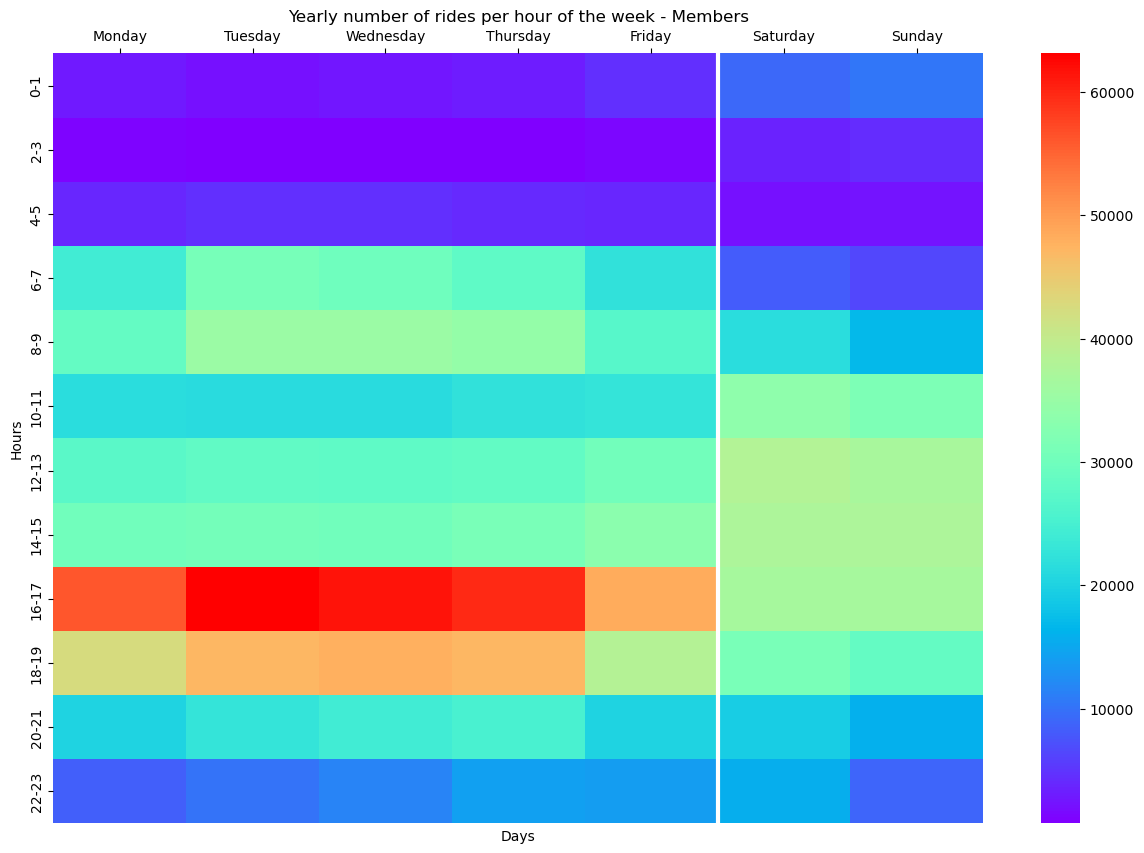

In [28]:
f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(member_times, annot=False, cmap='rainbow') #linewidth=.5,
#separate the weekend
ax.vlines(5, 0, 25, color='white', linewidth=3)
ax.xaxis.tick_top()
ax.set(title='Yearly number of rides per hour of the week - Members', xlabel="Days", ylabel="Hours")
plt.show()


In [29]:
#Filter the casual users
casual_filter = bike['member_casual'] == 'casual'
casual_bike = bike.loc[casual_filter, ['hour', 'member_casual', 'start_days']]

# Create a new column with properly-formatted hour bin labels
casual_bike['hour_bin_label'] = pd.cut(casual_bike['hour'], bins=range(0, 25, 2), right=False, labels=['{}-{}'.format(i, i+1) for i in range(0, 24, 2)])

#Drop the original hour column, so that it does not pollute our dataframe later
casual_bike = casual_bike.drop(['hour'], axis=1)

casual_times = casual_bike.pivot_table(index=['hour_bin_label'], columns=['start_days'], aggfunc=len)

#Drop the member_casual level
casual_times.columns = casual_times.columns.droplevel(0)

casual_times = casual_times[['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']]
casual_times
#casual_times.to_csv('weekly_schedule_casual.csv')




start_days,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
hour_bin_label,,,,,,,
0-1,4082,2587,2742,3382,5718,12691,15939
2-3,1759,939,943,1230,1977,5416,7209
4-5,1804,1545,1544,1610,1731,1870,2726
6-7,6477,7893,7866,7898,7291,4340,4049
8-9,9770,10815,10929,11225,10504,13885,11773
10-11,13042,10976,10344,11750,14231,29668,28215
12-13,18568,15133,14754,16383,21421,39057,36810
14-15,21342,17827,17521,19711,25144,42200,40207
16-17,29365,29404,30118,32959,33253,40828,37723


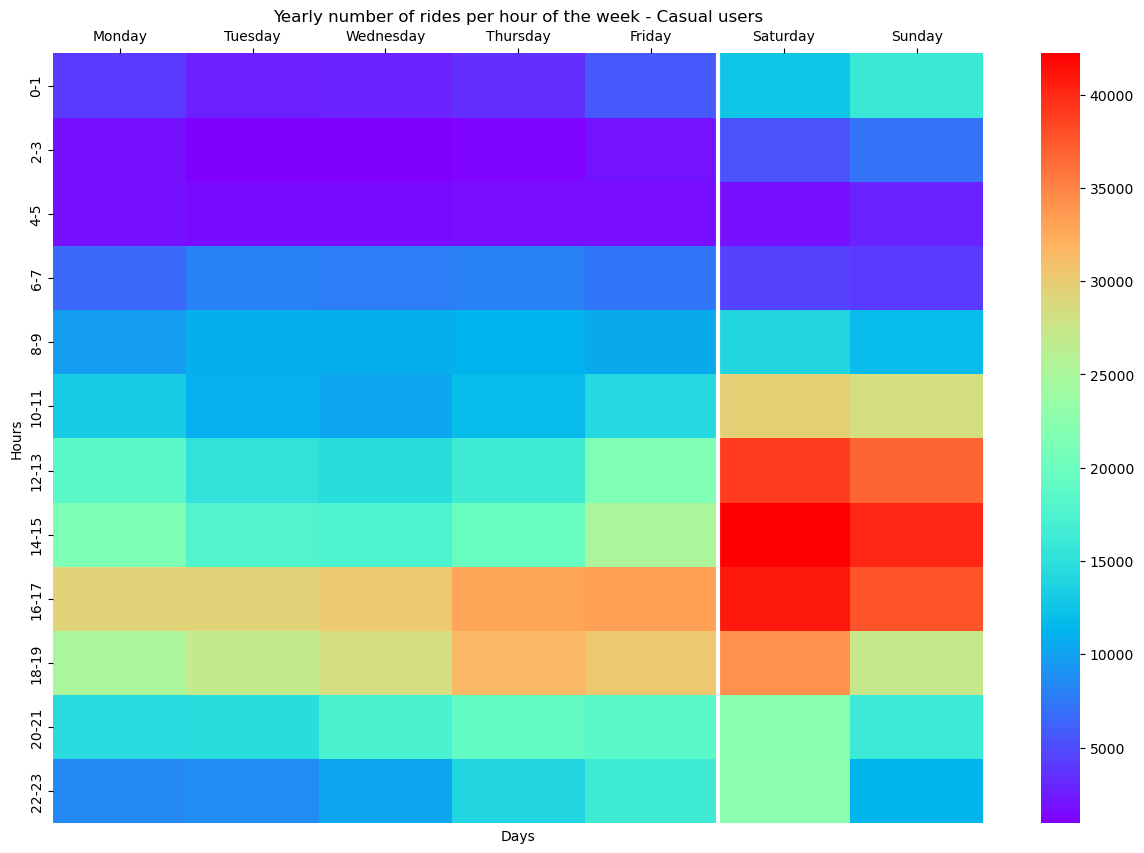

In [30]:
f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(casual_times, annot=False, cmap='rainbow') #linewidth=.5,
#separate the weekend
ax.vlines(5, 0, 25, color='white', linewidth=3)
ax.xaxis.tick_top()
ax.set(title='Yearly number of rides per hour of the week - Casual users', xlabel="Days", ylabel="Hours")
plt.show()


In [31]:
#Top10 most used start stations:
top10_stations = bike['start_station_name'].value_counts().to_frame().reset_index().head(10)
top10_stations.rename(columns = {'index': 'Station Names', 'start_station_name': 'Number of Usage'}, inplace=True)
top10_stations

,Station Names,Number of Usage
0,Streeter Dr & Grand Ave,37925
1,Wells St & Concord Ln,24393
2,DuSable Lake Shore Dr & North Blvd,23904
3,Clark St & Elm St,21534
4,Wells St & Elm St,20792
5,Michigan Ave & Oak St,20474
6,Kingsbury St & Kinzie St,20337
7,DuSable Lake Shore Dr & Monroe St,19128
8,Theater on the Lake,19045
9,Clark St & Lincoln Ave,17937


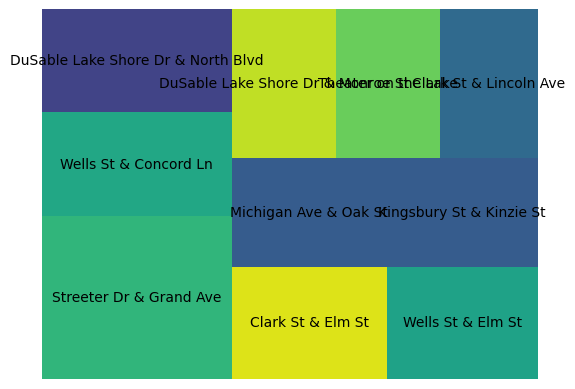

In [32]:
import squarify
squarify.plot(sizes=top10_stations['Number of Usage'], label=top10_stations['Station Names'])
plt.axis('off')
plt.show()

In [33]:
#number of bike types in stations

bike_stations = bike.groupby(['start_station_name', 'end_station_name'])['rideable_type'].value_counts().to_frame('numbers').reset_index()
bike_stations = bike_stations.sort_values(by = 'numbers', ascending = False)

In [34]:
#average ride duration between start and end stations
duration_between_stations = bike.groupby(['start_station_name','end_station_name'])['ride_length'].mean().to_frame()

In [35]:
bike_notna = bike.dropna(subset= ['start_station_name','end_station_name','start_station_id', 'end_station_id', 'end_lat', 'end_lat'])

In [36]:
bike_notna.isna().sum()

Unnamed: 0            0
ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
Year                  0
Month                 0
ride_length           0
Year-Month            0
start_days            0
hour                  0
dtype: int64

In [37]:
duration = pd.crosstab([bike_notna['start_station_name'],bike_notna['end_station_name']], bike_notna['rideable_type'], values = bike_notna['ride_length'], aggfunc=np.mean, margins=False, margins_name='Average Ride Duration')

In [38]:
duration2 = bike_notna.pivot_table(index=['start_station_name','end_station_name'], values=['ride_length', 'ride_id'], aggfunc={'ride_length': np.mean, 'ride_id': len})

In [39]:
#Top10 most used routes between stations:
duration2 = duration2.replace(np.nan, "-")
duration2 = duration2.reset_index().sort_values(by= 'ride_id', ascending = False).head(10)
duration2

,start_station_name,end_station_name,ride_id,ride_length
115356,Streeter Dr & Grand Ave,Streeter Dr & Grand Ave,4659,14.518123
45871,Ellis Ave & 60th St,Ellis Ave & 55th St,3708,5.130313
45921,Ellis Ave & 60th St,University Ave & 57th St,3507,4.430263
45713,Ellis Ave & 55th St,Ellis Ave & 60th St,3387,5.484583
116907,University Ave & 57th St,Ellis Ave & 60th St,3186,4.763120
43445,DuSable Lake Shore Dr & Monroe St,Streeter Dr & Grand Ave,3088,18.384904
43254,DuSable Lake Shore Dr & Monroe St,DuSable Lake Shore Dr & Monroe St,2874,15.977987
81105,Michigan Ave & Oak St,Michigan Ave & Oak St,1950,15.370718
115142,Streeter Dr & Grand Ave,DuSable Lake Shore Dr & North Blvd,1865,17.616434
82851,Millennium Park,Millennium Park,1822,12.517133
